In [1]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2960 - accuracy: 0.9143 - val_loss: 0.1412 - val_accuracy: 0.9563
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1423 - accuracy: 0.9580 - val_loss: 0.0992 - val_accuracy: 0.9712
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1085 - accuracy: 0.9673 - val_loss: 0.0890 - val_accuracy: 0.9743
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0872 - accuracy: 0.9728 - val_loss: 0.0807 - val_accuracy: 0.9756
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0749 - accuracy: 0.9763 - val_loss: 0.0788 - val_accuracy: 0.9755
Epoch 6/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0653 - accuracy: 0.9792 - val_loss: 0.0692 - val_accuracy: 0.9775
Epoch 7/10
60000/60000 [==============================] 

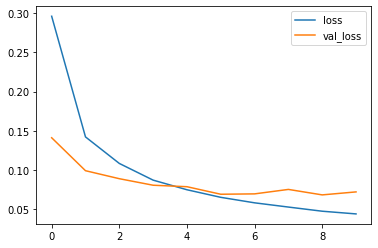

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

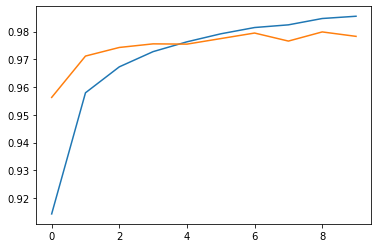

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.show()

In [10]:
print(model.evaluate(x_test,y_test))

10000/10000 [==============================] - 0s 22us/sample - loss: 0.0722 - accuracy: 0.9783
[0.07220668545138324, 0.9783]


In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

Confusion matrix, without normalization
[[ 968    1    0    1    1    1    1    1    4    2]
 [   0 1127    2    1    0    1    2    1    1    0]
 [   1    2 1010    4    4    0    1    5    5    0]
 [   0    1    3  987    0    5    0    5    5    4]
 [   0    1    0    0  960    1    7    1    2   10]
 [   2    0    0    5    2  872    4    0    6    1]
 [   6    3    1    1    3    5  936    0    3    0]
 [   1    5   11    2    1    0    0 1000    3    5]
 [   3    1    3    2    1    6    1    3  952    2]
 [   2    4    0    3   13    5    0    5    6  971]]


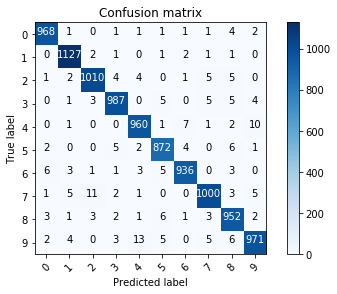

In [13]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)

plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'true label 0 predicted 7')

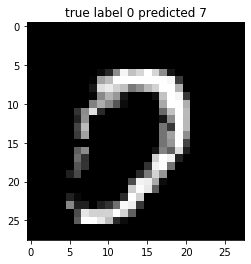

In [17]:
#show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')

plt.title("true label %s predicted %s" % (y_test[i], p_test[i]))